In [2]:
!pip install sumy

     |████████████████████████████████| 87 kB 3.8 MB/s 
     |████████████████████████████████| 10.1 MB 30.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21712 sha256=d05a4778acf352ccdc06ff8124ddb4ef8bfc06752b1982ebb13e8b0a34477c2c
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=4512691a78579527068613709c44ff017ea30c412d49c9236e82ef15ca5d230f
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built breadability pycountry


In [66]:
import os
import pandas as pd
from collections import Counter
#wordcloud
from PIL import Image
import numpy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#NLP Summarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

import nltk

from nltk.sentiment import SentimentIntensityAnalyzer

In [67]:
songs=os.listdir("/content/sample_data/1984 album Van Halen")

In [68]:
songs

['Hot for Teacher.txt',
 'House of Pain.txt',
 'Drop Dead Legs.txt',
 'Top Jimmy.txt',
 'Panama.txt',
 "I'll Wait.txt",
 'Jump.txt',
 'Girl Gone Bad.txt']

In [69]:
album_corpus=[]

for lyrics in songs:
  with open("/content/sample_data/1984 album Van Halen"+"/"+lyrics,encoding="utf8") as f_input:
    album_corpus.append(f_input.read())


In [70]:
album_corpus

['[Instrumental Intro]\n\n[Spoken]\n"Oh wow, man, that\'s it"\n"Wait a second, man\nWhat do you think the teacher\'s gonna look like this year?"\n"My butt, man!"\nOh, uh!\nOh yeah!\n\n[Verse 1]\nT-t-teacher, stop that screamin\'\nTeacher, don\'t you see?\nDon\'t wanna be no uptown fool\nMaybe I should go to Hell, but I\'m doin\' well\nAnd teacher needs to see me after school\n\n[Pre-Chorus]\nI think of all the education that I missed\nBut then my homework was never quite like this\n\n[Chorus]\nOw, got it bad, got it bad, got it bad\nI\'m hot for teacher\nI\'ve got it bad, so bad\nI\'m hot for teacher\n\n\n[Spoken]\n"Hey, I heard you missed us, we\'re back!"\n("I\'m ready")\n"I brought my pencil\nGimme something to write on, man!"\nYeah, go\nUh!\nOoh\n\n[Verse 2]\nI heard about your lessons, but lessons are so cold\nI know about this school\nLittle girl from Cherry Lawn, how can you be so bold?\nHow did you know that golden rule?\n\n[Pre-Chorus]\nI think of all the education that I miss

In [71]:
album_word_list=[]

for lyrics in album_corpus:
  for word in lyrics.split():
    album_word_list.append(word)


album_word_list



['[Instrumental',
 'Intro]',
 '[Spoken]',
 '"Oh',
 'wow,',
 'man,',
 "that's",
 'it"',
 '"Wait',
 'a',
 'second,',
 'man',
 'What',
 'do',
 'you',
 'think',
 'the',
 "teacher's",
 'gonna',
 'look',
 'like',
 'this',
 'year?"',
 '"My',
 'butt,',
 'man!"',
 'Oh,',
 'uh!',
 'Oh',
 'yeah!',
 '[Verse',
 '1]',
 'T-t-teacher,',
 'stop',
 'that',
 "screamin'",
 'Teacher,',
 "don't",
 'you',
 'see?',
 "Don't",
 'wanna',
 'be',
 'no',
 'uptown',
 'fool',
 'Maybe',
 'I',
 'should',
 'go',
 'to',
 'Hell,',
 'but',
 "I'm",
 "doin'",
 'well',
 'And',
 'teacher',
 'needs',
 'to',
 'see',
 'me',
 'after',
 'school',
 '[Pre-Chorus]',
 'I',
 'think',
 'of',
 'all',
 'the',
 'education',
 'that',
 'I',
 'missed',
 'But',
 'then',
 'my',
 'homework',
 'was',
 'never',
 'quite',
 'like',
 'this',
 '[Chorus]',
 'Ow,',
 'got',
 'it',
 'bad,',
 'got',
 'it',
 'bad,',
 'got',
 'it',
 'bad',
 "I'm",
 'hot',
 'for',
 'teacher',
 "I've",
 'got',
 'it',
 'bad,',
 'so',
 'bad',
 "I'm",
 'hot',
 'for',
 'teacher',
 

In [72]:
len(album_word_list)

1398

In [74]:
album_word_count_unique=Counter(album_word_list)

len(album_word_count_unique)

493

In [75]:
novel_corpus=[]

with open("/content/1984-novel-George Orwell.txt",encoding="utf8") as f_input:
  novel_corpus.append(f_input.read())


In [13]:
novel_word_list=novel_corpus[0].split()

In [14]:
novel_word_list

['Title:',
 'Nineteen',
 'eighty-four',
 'Author:',
 'George',
 'Orwell',
 '(pseudonym',
 'of',
 'Eric',
 'Blair)',
 '(1903-1950)',
 'PART',
 'ONE',
 'Chapter',
 '1',
 'It',
 'was',
 'a',
 'bright',
 'cold',
 'day',
 'in',
 'April,',
 'and',
 'the',
 'clocks',
 'were',
 'striking',
 'thirteen.',
 'Winston',
 'Smith,',
 'his',
 'chin',
 'nuzzled',
 'into',
 'his',
 'breast',
 'in',
 'an',
 'effort',
 'to',
 'escape',
 'the',
 'vile',
 'wind,',
 'slipped',
 'quickly',
 'through',
 'the',
 'glass',
 'doors',
 'of',
 'Victory',
 'Mansions,',
 'though',
 'not',
 'quickly',
 'enough',
 'to',
 'prevent',
 'a',
 'swirl',
 'of',
 'gritty',
 'dust',
 'from',
 'entering',
 'along',
 'with',
 'him.',
 'The',
 'hallway',
 'smelt',
 'of',
 'boiled',
 'cabbage',
 'and',
 'old',
 'rag',
 'mats.',
 'At',
 'one',
 'end',
 'of',
 'it',
 'a',
 'coloured',
 'poster,',
 'too',
 'large',
 'for',
 'indoor',
 'display,',
 'had',
 'been',
 'tacked',
 'to',
 'the',
 'wall.',
 'It',
 'depicted',
 'simply',
 'an',

In [15]:
len(novel_word_list)

103377

In [16]:
len(Counter(novel_word_list))

15530

In [17]:
stop_words=list(get_stop_words("english"))
stop_words

['uucp',
 'contains',
 'also',
 'sometimes',
 'thus',
 'ok',
 'elsewhere',
 "here's",
 'which',
 'clearly',
 'whenever',
 'beyond',
 'across',
 'somehow',
 'hereafter',
 'indicated',
 'nevertheless',
 'thereafter',
 'x',
 'd',
 'most',
 "why's",
 'okay',
 'look',
 "you've",
 'novel',
 'k',
 'became',
 'may',
 'que',
 'these',
 'willing',
 'overall',
 'right',
 "t's",
 'but',
 'away',
 'almost',
 'as',
 'was',
 'allows',
 'why',
 'unfortunately',
 'former',
 'name',
 "you'd",
 'th',
 'would',
 'hither',
 'according',
 'ever',
 'of',
 'unto',
 'relatively',
 'whose',
 'can',
 "he'll",
 'accordingly',
 'ignored',
 'comes',
 'becoming',
 'taken',
 'should',
 'know',
 'wherein',
 'et',
 'causes',
 'theirs',
 'etc',
 'other',
 'going',
 'probably',
 'various',
 'are',
 'becomes',
 "he's",
 'specifying',
 'thorough',
 'cannot',
 'consequently',
 'w',
 'o',
 'among',
 'inner',
 'un',
 'last',
 'brief',
 'contain',
 'allow',
 'more',
 'do',
 'thanks',
 'far',
 'now',
 'despite',
 'actually',
 '

In [76]:
clean_album_word_list=[]

for word in album_word_list:
  if word not in stop_words:
    clean_album_word_list.append(word)





In [79]:
frequency_of_clean_album_words=nltk.FreqDist(clean_album_word_list)
frequency_of_clean_album_words

FreqDist({'"Class': 2,
          '"Hey,': 2,
          '"I': 4,
          '"My': 2,
          '"Oh': 4,
          '"Wait': 2,
          "'Cause": 1,
          '("I\'m': 2,
          '("What': 2,
          '(Girl)': 2,
          '(Jump!)': 6,
          '(girl)': 1,
          '(guitar': 1,
          '(oh': 1,
          '(ow,': 1,
          '(say,': 1,
          '(yeah,': 1,
          '1]': 6,
          '2]': 6,
          'Ah': 2,
          'Ah,': 2,
          "Ain't": 1,
          'And': 6,
          'Baby,': 1,
          'Betty': 1,
          'Boop': 1,
          'But': 7,
          'Cherry': 2,
          'Dig': 2,
          "Don't": 4,
          'Driving': 1,
          'Drop': 1,
          'Ease': 1,
          'Found': 1,
          'Fresh': 1,
          'Get': 1,
          'Giant': 1,
          'Gimme': 2,
          'Girl': 6,
          'Go': 6,
          'God!': 2,
          'Gonna': 2,
          'Got': 2,
          'Guess': 1,
          "He's": 1,
          "Heartache's": 1,
        

In [80]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (14,5)

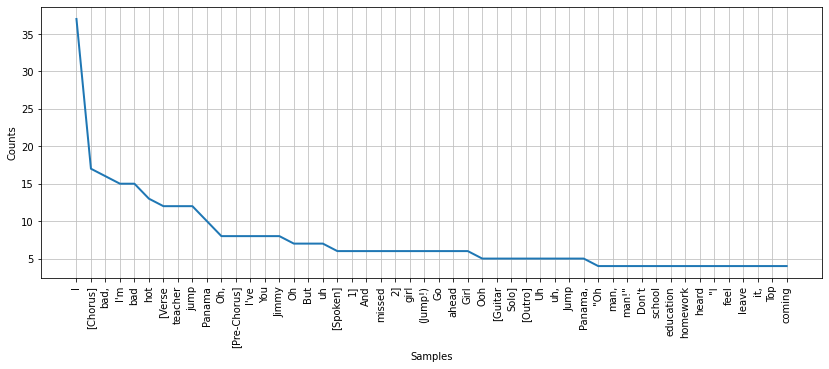

In [81]:
frequency_of_clean_album_words.plot(50,cumulative=False)

In [82]:
count_clean_album_word_list=Counter(clean_album_word_list)

In [38]:
wordcloud_1984_album=WordCloud(width=1000,height=500).generate_from_frequencies(count_clean_album_word_list)

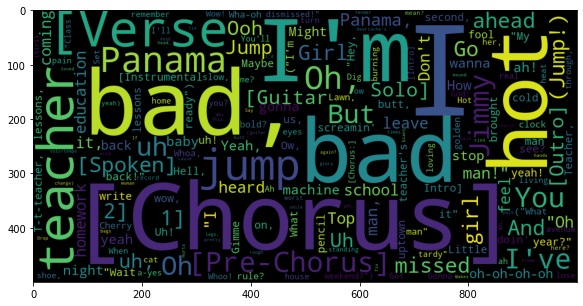

In [40]:
plt.imshow(wordcloud_1984_album)

In [41]:
clean_novel_word_list=[]

for word in novel_word_list:
  if word not in stop_words:
    clean_novel_word_list.append(word)

In [42]:
frequency_of_clean_novel_words=nltk.FreqDist(clean_novel_word_list)
frequency_of_clean_novel_words

FreqDist({'Title:': 1,
          'Nineteen': 1,
          'eighty-four': 1,
          'Author:': 1,
          'George': 1,
          'Orwell': 1,
          '(pseudonym': 1,
          'Eric': 1,
          'Blair)': 1,
          '(1903-1950)': 1,
          'PART': 3,
          'ONE': 4,
          'Chapter': 31,
          '1': 3,
          'It': 466,
          'bright': 5,
          'cold': 14,
          'day': 49,
          'April,': 1,
          'clocks': 2,
          'striking': 1,
          'thirteen.': 1,
          'Winston': 316,
          'Smith,': 4,
          'chin': 2,
          'nuzzled': 1,
          'breast': 7,
          'effort': 22,
          'escape': 5,
          'vile': 1,
          'wind,': 2,
          'slipped': 10,
          'quickly': 11,
          'glass': 34,
          'doors': 1,
          'Victory': 17,
          'Mansions,': 2,
          'prevent': 9,
          'swirl': 1,
          'gritty': 3,
          'dust': 15,
          'entering': 3,
          'him.': 

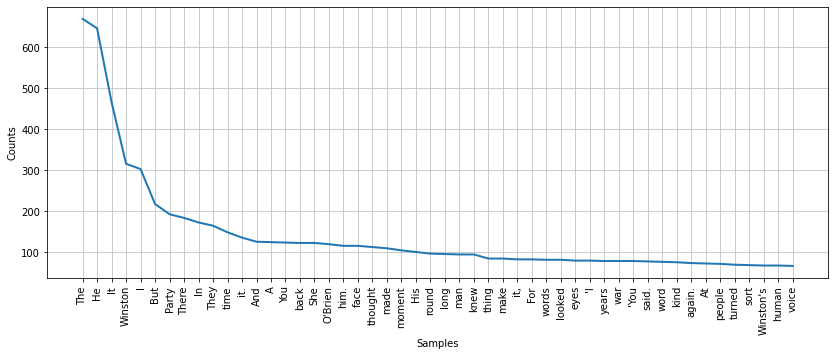

In [43]:
frequency_of_clean_novel_words.plot(50,cumulative=False)

In [44]:
count_clean_novel_word_list=Counter(clean_novel_word_list)

In [45]:
wordcloud_1984_novel=WordCloud(width=1000,height=500).generate_from_frequencies(count_clean_novel_word_list)

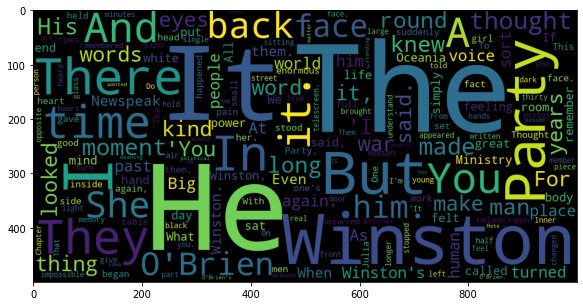

In [46]:
plt.imshow(wordcloud_1984_novel)

In [48]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [50]:
lsa=LsaSummarizer(Stemmer("english"))

In [57]:
lsa.stop_words = get_stop_words("english")
parser=PlaintextParser.from_string( " ".join(album_corpus), Tokenizer("english")) 
lsa_summary =lsa(parser.document, 10) 
lsa_summary_list=[str(sentences) for sentences in lsa_summary]
summary_album=" ".join(lsa_summary_list)

In [58]:
summary_album

"[Verse 1] Say you're gonna leave me 'Cause I only tie you up I always loved you tender But you only like it rough Woman bound for glory Why you're leavin' me again? Dig those moves, vampire Set me loose, get it higher Throw my rope, loop-de-loop Nice white teeth, Betty Boop Set it cool, real heavy I ain't fooled, gettin' ready Oooh, aw baby Juke-joint Jimmy is the latest thing, he's got the sound that everybody digs And the joint been jumpin' when the band been pumpin' and you know they're playing crazy gigs Well you ain't been living till you've seen the living end Top Jimmy and his Rhythm Pigs Here she comes, full blast and top down Hot shoe, burning down the avenue Model citizen, zero discipline [Verse 2] Ain't nothin' like it, her shiny machine Got the feel for the wheel, keep the moving parts clean Hot shoe, burning down the avenue Out an on-ramp coming through my bedroom [Spoken Interlude] Ah Yeah, we're running a little bit hot tonight I can barely see the road from the heat co

In [60]:
lsa.stop_words = get_stop_words("english")
parser=PlaintextParser.from_string( " ".join(novel_corpus), Tokenizer("english")) 
lsa_summary =lsa(parser.document, 10) 
lsa_summary_list=[str(sentences) for sentences in lsa_summary]
summary_novel=" ".join(lsa_summary_list)

/usr/local/lib/python3.7/dist-packages/sumy/summarizers/lsa.py:76: UserWarning: Number of words (5812) is lower than number of sentences (6827). LSA algorithm may not work properly.
  warn(message % (words_count, sentences_count))


In [64]:
nltk.download("vader_lexicon")
sentiment_analyzer=SentimentIntensityAnalyzer()

sentiment_analyzer.polarity_scores(" ".join(album_corpus))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'compound': -0.9962, 'neg': 0.156, 'neu': 0.714, 'pos': 0.131}

In [65]:
sentiment_analyzer=SentimentIntensityAnalyzer()

sentiment_analyzer.polarity_scores(" ".join(novel_corpus))

{'compound': -1.0, 'neg': 0.106, 'neu': 0.799, 'pos': 0.096}